### Pair Programming Normalización
En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificasteis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizadla. 

Podéis usar el método que prefiráis o el que mejor se ajuste


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv("../datos/sephora_website_dataset.csv", index_col = 0)
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.8


En nuestro caso la variable respuesta es rating. Volvemos a mostrar aquí, de forma visual, su distribución con un displot y un histplot más abajo.

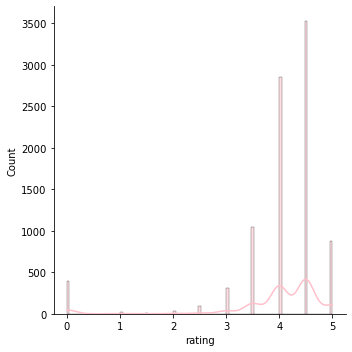

In [3]:


sns.displot(df['rating'], kde = True, color = "pink");



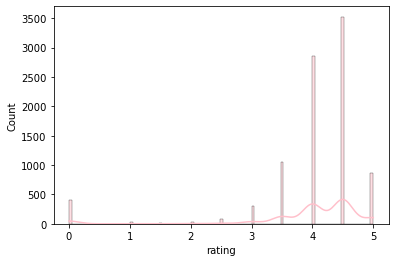

In [4]:
sns.histplot(df['rating'], kde = True, color = 'pink');

### Método manual de normalización

Creamos variables con los estadísticos que necesitamos.

In [5]:

media = df["rating"].mean()
maximo = df["rating"].max() 
minimo = df["rating"].min()

Creamos una columna nueva con el resultado de la normalización

In [6]:

df["rating_norm"] = (df["rating"] - media) / (maximo - minimo )
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,rating_norm
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.8,0.001996


Visualizamos el resultado usando distplots - cambios casi imperceptibles. 


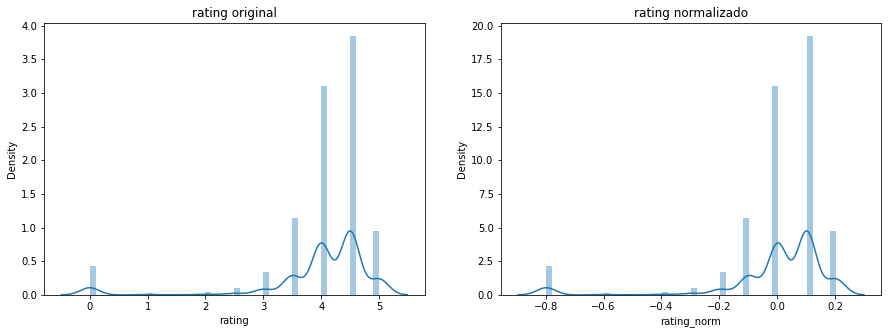

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('rating original')
axes[1].set_title('rating normalizado')

sns.distplot(df['rating'] ,ax = axes[0])
sns.distplot(df["rating_norm"], ax = axes[1]);

Importamos y usamos el Kolmogorov Smirnov para probar analíticamente nuestros resultados 

In [8]:
from scipy.stats import kstest


In [9]:
kstest(df['rating_norm'], 'norm')

KstestResult(statistic=0.4199598969818229, pvalue=0.0)


Nuestros datos siguen siendo no normales, por lo que seguiremos probando métodos.

### Transformación logarítmica o raíz cuadrada

Para poder realizar esta transformación es importante que no tengamos ningún valor 0 en la variable. 
Usando esta list comprehension omitiremos los 0 cuando pasemos la lambda a través del método .apply().

In [10]:
df['rating_log'] = df['rating'].apply(lambda x: np.log(x) if x > 0 else 0)
df.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,rating_norm,rating_log
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.8,0.001996,1.386294
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,0.9,0.101996,1.504077
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,0.9,0.101996,1.504077


Mostramos los resultados de la transformación logarítmica con dos distplots: no hemos conseguido normalizarla.

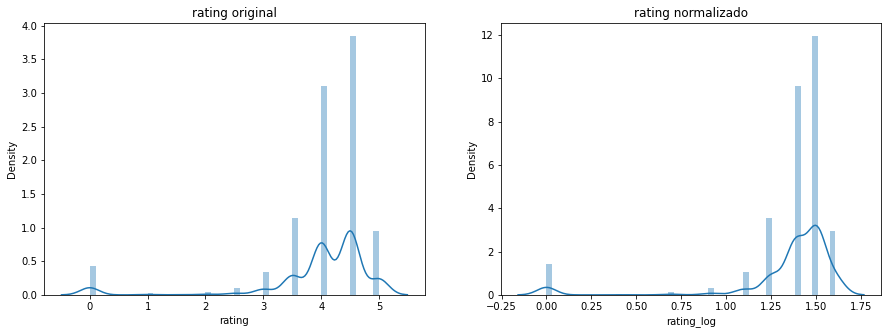

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('rating original')
axes[1].set_title('rating normalizado')

sns.distplot(df['rating'] ,ax = axes[0])
sns.distplot(df["rating_log"], ax = axes[1]);

Volvemos a testear con el Kolmogorov Smirnov 

In [12]:
kstest(df['rating_log'], 'norm')

KstestResult(statistic=0.8032765930566559, pvalue=0.0)

De nuevo un pvalor de 0.0, datos no normales

### Raíz cuadrada

Con el método de normalización siguiente intentamos que la distribución de los datos sea más compacta cuando apliquemos la raíz cuadrado de *todos los elementos*. 
Este método puede aumentar la anormalidad de los datos, aumentando sesgos ya existentes, por ejemplo. 

In [13]:
df["rating_raiz"] = df["rating"].apply(lambda x: math.sqrt(x))
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,rating_norm,rating_log,rating_raiz
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.8,0.001996,1.386294,2.0


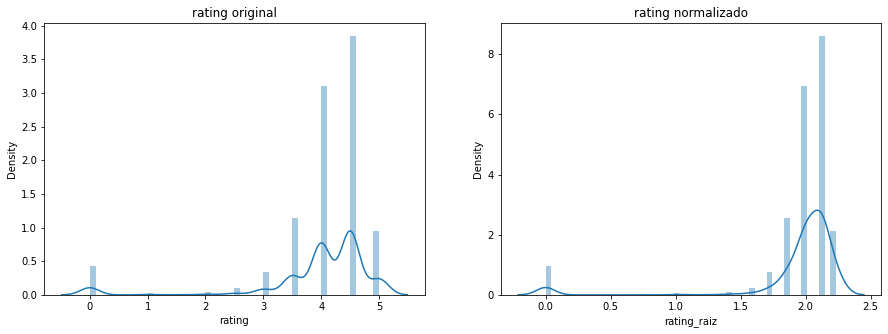

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('rating original')
axes[1].set_title('rating normalizado')

sns.distplot(df['rating'] ,ax = axes[0])
sns.distplot(df["rating_raiz"], ax = axes[1]);

Observamos que se crea una curva ligeramente parecida a una campana de Gauss pero está tan sesgada hacia la derecha que no sirve como prueba de haber transformado los datos y haber conseguido normalidad. 

Volvemos a usar el test Kolmogorov Smirnov para extraer el pvalor.

In [15]:
kstest(df['rating_raiz'], 'norm')

KstestResult(statistic=0.8976129423663051, pvalue=0.0)

De nuevo un pvalor de 0.0: datos no normales. Pasamos al siguiente método.

### stats.boxcox()

Para usar el método boxcox importamos stats de la librería scipy.

Este método es bastante complejo de explicar, pero se podría resumir en ampliar la diferencia entre los datos más pequeños y reducirla entre los más altos, basándose en las diferencias de pendiente logarítmica de los mismos, para lograr la deseada normalidad. 

In [16]:
from scipy import stats

In [17]:
df['rating_box'], lambda_ajustada = stats.boxcox(df['rating'])

ValueError: Data must be positive.

Vemos que nos devuelve el error 'Data must be positive'. Se debe a que uno de nuestros valores es 0.

In [18]:
df["rating"].unique()

array([4. , 4.5, 3.5, 5. , 3. , 0. , 2.5, 2. , 1. , 1.5])

Pasamos al siguiente método de normalización.

### Min Max Scaler

Este método trabaja como un traductor entre cada variable a transformar, de manera individual, y su equivalente en un rango determinado, que, por defecto, es de entre 0-1. Para usarlo deberemos hacer la siguiente importación:

In [19]:
from sklearn.preprocessing import MinMaxScaler

El proceso es el siguiente:
- Sacar las columnas numéricas en una variable
- Construir el modelo escalador
- Ajustar dicho modelo
- Transformar los datos
- Verificar los valores mínimos después de la normalización
- Verificar los valores máximos


In [20]:
numericas = df.select_dtypes(include = np.number) 

In [21]:
minmax = MinMaxScaler() 

In [22]:
minmax.fit(df[['rating']]) 

MinMaxScaler()

In [23]:
X_normalizadas = minmax.transform(df[["rating"]]) 

In [24]:
X_normalizadas.min(axis=0)

array([0.])

In [25]:
X_normalizadas.max(axis=0)

array([1.])

Llegadas a este punto ya tenemos los datos normalizados con éxito: en las dos celdas superiores vemos como los valores son de 0 para los mínimos y de 1 para los máximos. 

Convertimos ese array en un dataframe.

In [26]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["rating_Sklearn"])

Añadimos la columna a nuestro dataframe que, llegadas a este punto, ya contiene todos los métodos de normalización posibles. 

In [27]:
df["rating_Sklearn"] = numericas_minmax

df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.8,0.001996,1.386294,2.0,0.8


Comprobamos visualmente si nuestra variable tiene una distribución normal usando un distplot.

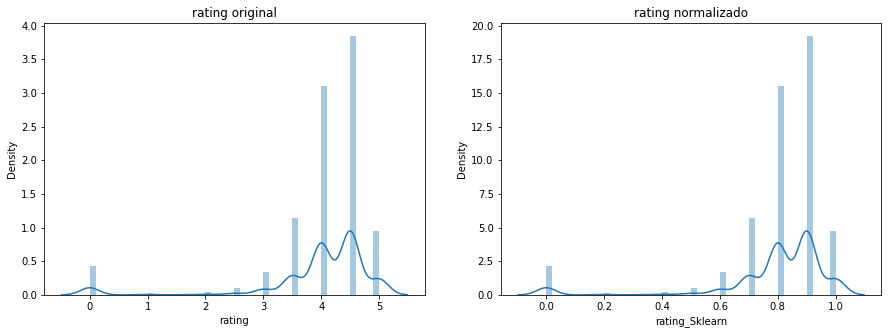

In [28]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('rating original')
axes[1].set_title('rating normalizado')

sns.distplot(df['rating'] ,ax = axes[0])
sns.distplot(df['rating_Sklearn'], ax = axes[1]);

De nuevo vemos que no normalizamos la variable. 

In [29]:
kstest(df['rating_Sklearn'], 'norm')

KstestResult(statistic=0.6649920829480067, pvalue=0.0)

Lo comprobamos con el KS. 

> Conclusión: Nuestros datos no son normalizables y el método que más nos los acerca a una campana de Gauss es el de raíz cuadrada, al menos, de manera visual. 

Eliminamos todas las columnas extra

In [30]:
df.drop(['rating_norm', 'rating_log', 'rating_Sklearn', 'rating_minmax'], axis = 1, inplace = True)

In [31]:
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_raiz
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,2.0



   - Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

Happy coding 📈📊📉

In [32]:
df.to_csv("../datos/sephora_website_dataset2.csv")